In [89]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
pd.options.display.float_format = '{:.4f}'.format
plt.style.use('seaborn')

/var/folders/5z/wzj0qt495bbdktpqnnk1nx100000gn/T/ipykernel_82205/1634794211.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
def getYData(symbol):
    start = "2015-01-02"
    end = "2022-12-31"
    return yf.download(symbol,start,end)

In [4]:
df = getYData('GE')

[*********************100%***********************]  1 of 1 completed


In [18]:
geDf = df['Close'].copy()

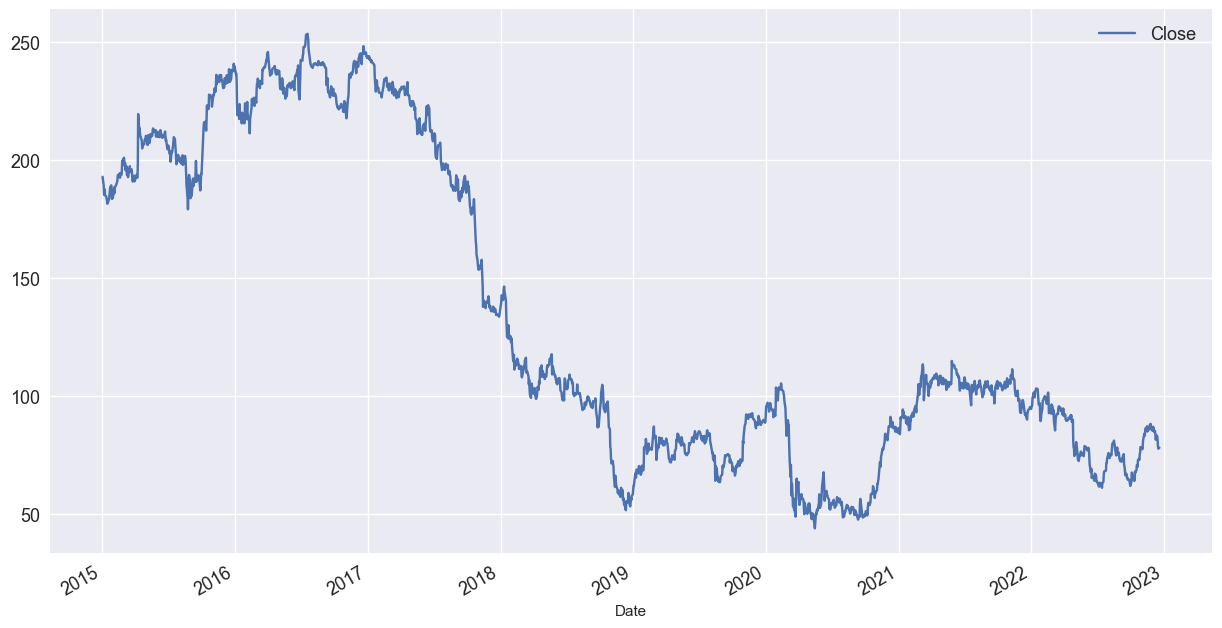

In [25]:
geDf.dropna().plot(figsize=(15,8),fontsize=13)
plt.legend(fontsize=13)
plt.show()

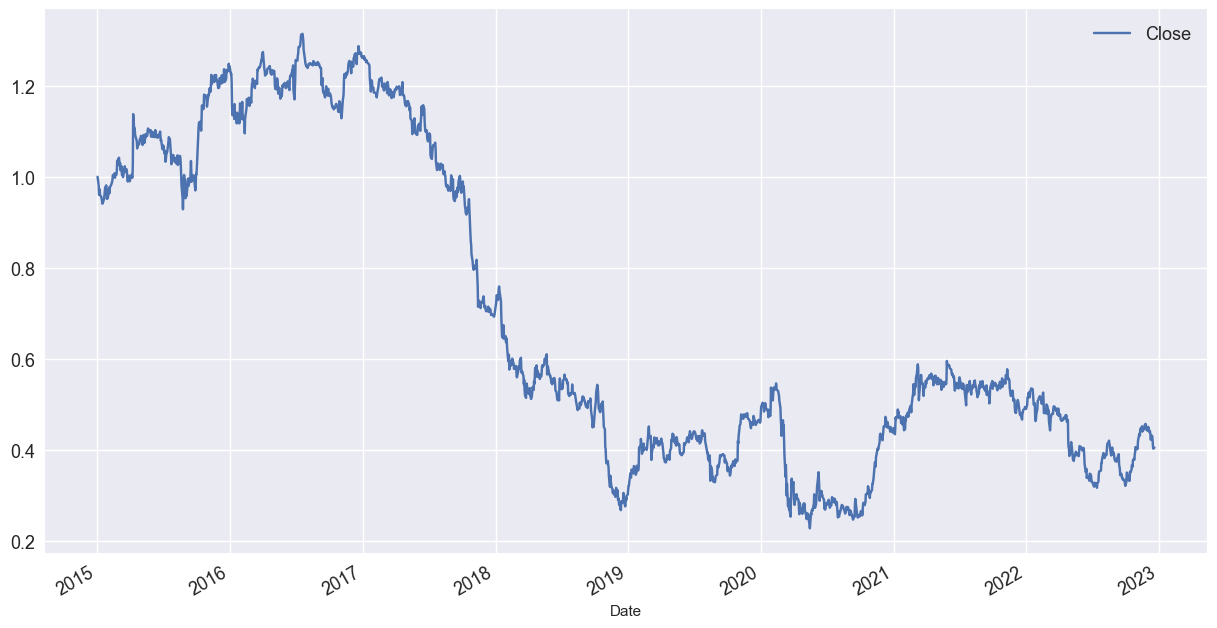

In [34]:
norm = geDf.div(geDf.iloc[0])
norm.dropna().plot(figsize=(15,8),fontsize=13)
plt.legend(fontsize=13)
plt.show()

In [35]:
symbol = ["BA","MSFT", "^DJI", "EURUSD=X", "GC=F", "BTC-USD"]
df = getYData(symbol)

[*********************100%***********************]  6 of 6 completed


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2910 entries, 2015-01-02 to 2022-12-20
Freq: D
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Adj Close, BA)        2006 non-null   float64
 1   (Adj Close, BTC-USD)   2910 non-null   float64
 2   (Adj Close, EURUSD=X)  2075 non-null   float64
 3   (Adj Close, GC=F)      2004 non-null   float64
 4   (Adj Close, MSFT)      2006 non-null   float64
 5   (Adj Close, ^DJI)      2006 non-null   float64
 6   (Close, BA)            2006 non-null   float64
 7   (Close, BTC-USD)       2910 non-null   float64
 8   (Close, EURUSD=X)      2075 non-null   float64
 9   (Close, GC=F)          2004 non-null   float64
 10  (Close, MSFT)          2006 non-null   float64
 11  (Close, ^DJI)          2006 non-null   float64
 12  (High, BA)             2006 non-null   float64
 13  (High, BTC-USD)        2910 non-null   float64
 14  (High, EURUSD=X)       2075 no

<function matplotlib.pyplot.show(close=None, block=None)>

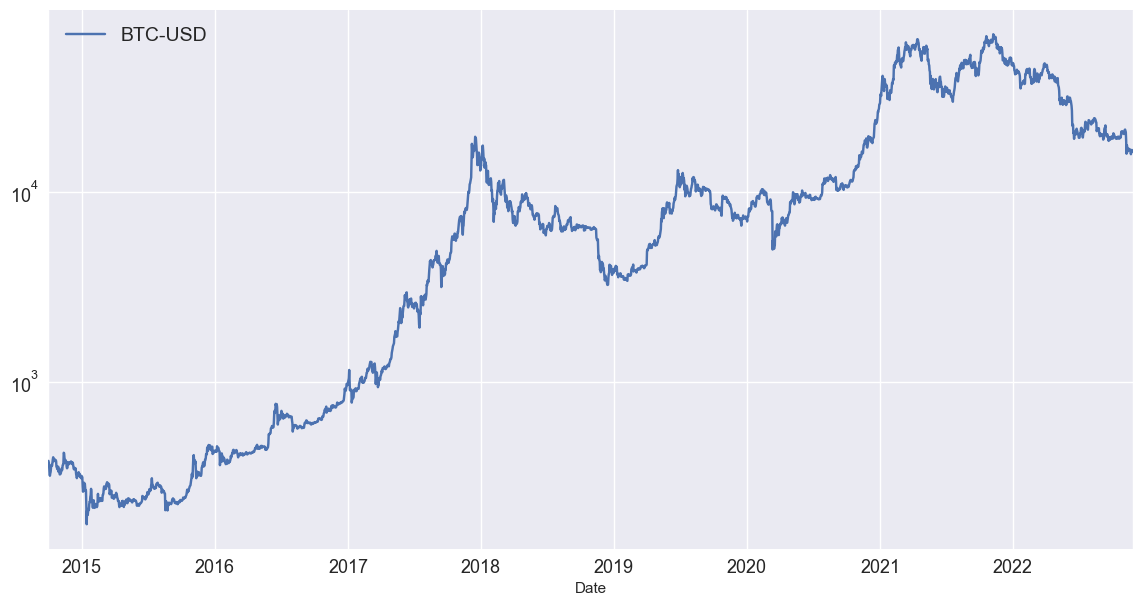

In [61]:
df['Close']['BTC-USD'].dropna().plot(figsize=(14,7), fontsize= 13, logy=True)
plt.legend(fontsize=14)
plt.show

In [70]:
msft = df.Close.MSFT.dropna().to_frame().copy()
msft.rename(columns={'MSFT':'price'},inplace=True)
msft

,price
Date,
2015-01-02,46.7600
2015-01-05,46.3300
2015-01-06,45.6500
2015-01-07,46.2300
2015-01-08,47.5900
...,...
2022-12-13,256.9200
2022-12-14,257.2200
2022-12-15,249.0100


In [71]:
msft["P_lag1"] = msft.shift(periods=1)
msft["P_diff"] = msft.price.sub(msft.P_lag1)
pd.DataFrame(msft)

,price,P_lag1,P_diff
Date,,,
2015-01-02,46.7600,NaN,NaN
2015-01-05,46.3300,46.7600,-0.4300
2015-01-06,45.6500,46.3300,-0.6800
2015-01-07,46.2300,45.6500,0.5800
2015-01-08,47.5900,46.2300,1.3600
...,...,...,...
2022-12-13,256.9200,252.5100,4.4100
2022-12-14,257.2200,256.9200,0.3000
2022-12-15,249.0100,257.2200,-8.2100


In [72]:
msft["P_diff_2"] = msft.price.diff(periods=1)
msft

,price,P_lag1,P_diff,P_diff_2
Date,,,,
2015-01-02,46.7600,NaN,NaN,NaN
2015-01-05,46.3300,46.7600,-0.4300,-0.4300
2015-01-06,45.6500,46.3300,-0.6800,-0.6800
2015-01-07,46.2300,45.6500,0.5800,0.5800
2015-01-08,47.5900,46.2300,1.3600,1.3600
...,...,...,...,...
2022-12-13,256.9200,252.5100,4.4100,4.4100
2022-12-14,257.2200,256.9200,0.3000,0.3000
2022-12-15,249.0100,257.2200,-8.2100,-8.2100


<function matplotlib.pyplot.show(close=None, block=None)>

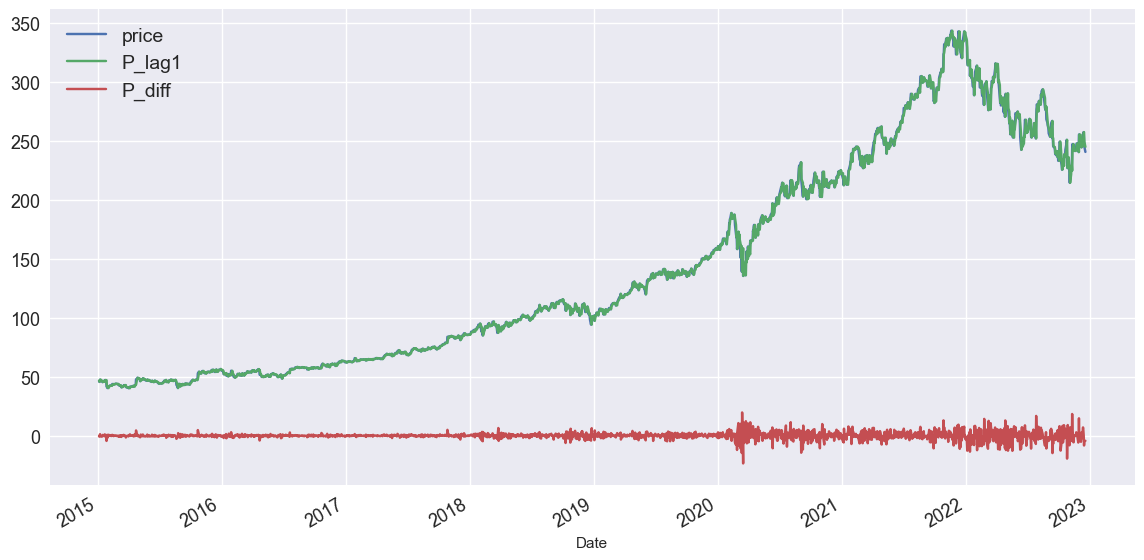

In [43]:
msft.dropna().plot(figsize=(14,7), fontsize= 13)
plt.legend(fontsize=14)
plt.show

In [73]:
msft.drop(columns=["P_diff","P_lag1"],inplace=True)
msft.rename(columns={"P_diff_2":"returns"},inplace=True)

In [74]:
msft.describe()

,price,returns
count,2006.0000,2005.0000
mean,142.5406,0.0966
std,88.6293,3.1324
min,40.2900,-23.4100
25%,62.6250,-0.7300
50%,109.6100,0.0600
75%,219.9900,1.0000
max,343.1100,19.7700


In [77]:
multiple = msft.price[-1]/msft.price[0]
diff = msft.index[-1]-msft.index[0]
td_years = diff.days / (365.25)
td_years
multiple

5.142215688179651

In [78]:
msft.returns

Date
2015-01-02       NaN
2015-01-05   -0.4300
2015-01-06   -0.6800
2015-01-07    0.5800
2015-01-08    1.3600
               ...  
2022-12-13    4.4100
2022-12-14    0.3000
2022-12-15   -8.2100
2022-12-16   -4.3200
2022-12-19   -4.2400
Name: returns, Length: 2006, dtype: float64

In [79]:
multiple = (1+msft.returns).prod()
multiple

-0.0

In [65]:
cagr = multiple**(1/td_years)

In [80]:
cagr

1.2283489189561994

## Compund Returns and Geometric Mean Return

In [82]:
msft

,price,returns
Date,,
2015-01-02,46.7600,NaN
2015-01-05,46.3300,-0.4300
2015-01-06,45.6500,-0.6800
2015-01-07,46.2300,0.5800
2015-01-08,47.5900,1.3600
...,...,...
2022-12-13,256.9200,4.4100
2022-12-14,257.2200,0.3000
2022-12-15,249.0100,-8.2100


In [88]:
multiple = 

-0.0

In [115]:
from dateutil.relativedelta import relativedelta

today = datetime.today().replace(hour=0, minute=0, second=0)
t = today-relativedeltaativedelta(weeks=20)
t.timestamp()*1000

1659465000515.162

In [97]:
(21-20)%1

0